<a href="https://colab.research.google.com/github/arthurvaz05/Python.Script/blob/master/gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.style.use(['ggplot'])

<h5> Gerar dataset:
\begin{equation} \theta_0= 10 \end{equation} 
\begin{equation} \theta_1= 5 \end{equation} 

Erro com distribuição gaussiana

In [4]:
X = 2 * np.random.rand(100,1)
y = 10 +5 * X+np.random.randn(100,1)

Plot para visualizar a relaçnao de x e y

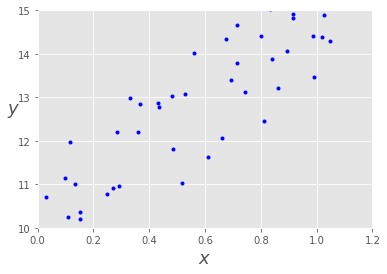

In [5]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,1.2,10,15])

Como foi adicionado um erro com uma distribuição gaussiana, ele não chega no valor exato estipulado anteriormente

In [6]:
#Achar a reta linear que minimiza o erro
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[10.00017765]
 [ 5.06771309]]


In [7]:
#Prever valores aletatórios
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[10.00017765],
       [20.13560384]])

(0.0, 1.2, 10.0, 15.0)

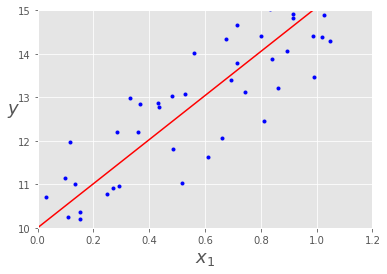

In [8]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,1.2,10,15])

#Função de custo & gradiente

<h4> A equação para calcular a função de custo e gradientes é mostrada abaixo. Observe que a função de custo é para regressão linear. Para outros algoritmos, a função de custo será diferente e os gradientes deverão ser derivados das funções de custo



<b>Cost</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [9]:
def  cal_cost(theta,X,y):
  
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [10]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):

    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
    
    return theta, cost_history, theta_history

<h3> Vamos começar com 100000 iterações e uma taxa de aprendizado (learning rate) de 0,01. Comece com teta de uma distribuição gaussiana


In [11]:
lr =0.1
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]

import time
comeco = time.clock()
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)
fim = time.clock()

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('Tempo de execucao:  {:0.3f}'.format((fim - comeco)))

Theta0:          10.000,
Theta1:          5.068
Final cost/MSE:  4631.675
Tempo de execucao:  0.017


<h3> Vamos traçar o histórico de custos ao longo das iterações

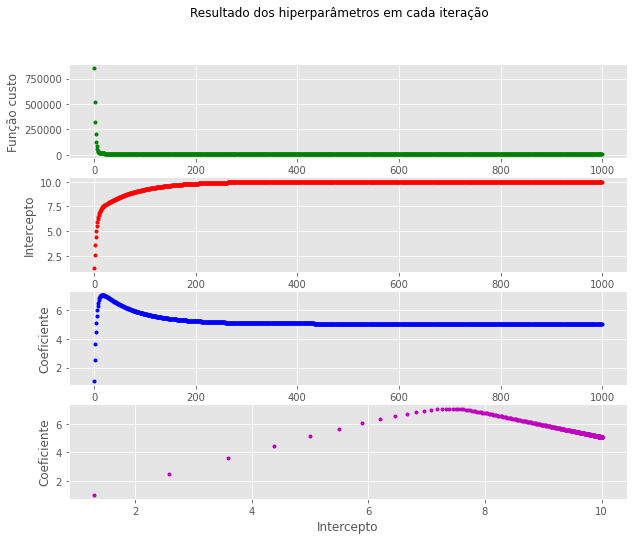

In [12]:
fig, axs = plt.subplots(4,figsize=(10,8))
fig.suptitle('Resultado dos hiperparâmetros em cada iteração')
axs[0].set_ylabel('Função custo',rotation=90)
#axs[0].set_xlabel('Iterações')
axs[0].plot(range(n_iter),cost_history,'g.')
axs[1].set_ylabel('Intercepto',rotation=90)
#axs[1].set_xlabel('Iterações')
axs[1].plot(range(n_iter),theta_history[:,0],'r.')
axs[2].set_ylabel('Coeficiente',rotation=90)
axs[2].set_xlabel('Iterações')
axs[2].plot(range(n_iter),theta_history[:,1],'b.')
axs[3].set_ylabel('Coeficiente',rotation=90)
axs[3].set_xlabel('Intercepto')
axs[3].plot(theta_history[:,0],theta_history[:,1],'m.')

In [13]:
gd0 = theta_history[:,0]
gd1 = theta_history[:,1]

<h3> Após cerca de 150 iterações, o custo é fixo, portanto as iterações restantes não são necessárias ou não resultarão em nenhuma otimização posterior. Vamos ampliar até a iteração 200 e ver a curva

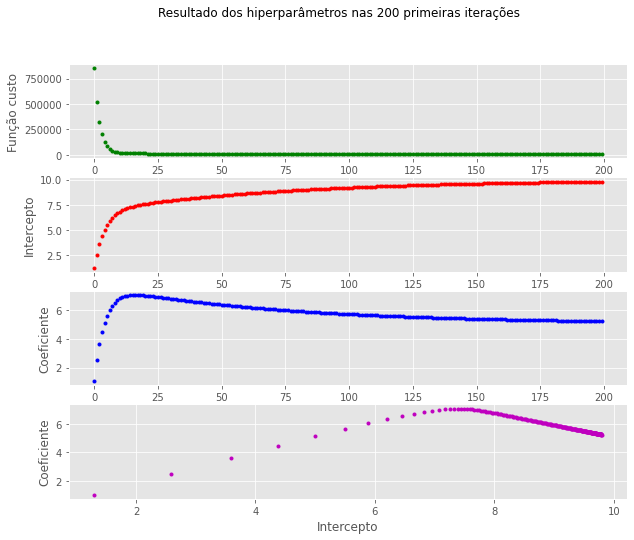

In [14]:
fig, axs = plt.subplots(4,figsize=(10,8))
fig.suptitle('Resultado dos hiperparâmetros nas 200 primeiras iterações')
axs[0].set_ylabel('Função custo',rotation=90)
#axs[0].set_xlabel('Iterações')
axs[0].plot(range(200),cost_history[:200],'g.')
axs[1].set_ylabel('Intercepto',rotation=90)
#axs[1].set_xlabel('Iterações')
axs[1].plot(range(200),theta_history[range(200),0],'r.')
axs[2].set_ylabel('Coeficiente',rotation=90)
axs[2].set_xlabel('Iterações')
axs[2].plot(range(200),theta_history[range(200),1],'b.')
axs[3].set_ylabel('Coeficiente',rotation=90)
axs[3].set_xlabel('Intercepto')
axs[3].plot(theta_history[range(200),0],theta_history[range(200),1],'m.')

<t> Vale a pena notar que o custo cai mais rápido inicialmente e depois o ganho na redução de custo não é tanto

# Stochastic Gradient Descent

In [33]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history0 = np.zeros(iterations)
    theta_history1 = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        theta_history0[it] = theta[0][0]
        theta_history1[it] = theta[1][0]
        
    return theta, cost_history, theta_history0, theta_history1

In [34]:
lr =0.1
n_iter = 500

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
comeco = time.clock()
theta,cost_history, theta_history0, theta_history1 = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)
fim = time.clock()

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('Tempo de execucao:  {:0.3f}'.format((fim - comeco)))
print('Iteração com menor função custo:  {:0.0f}'.format(np.where(cost_history==min(cost_history))[0][0]))

Theta0:          9.987,
Theta1:          5.092
Final cost/MSE:  36.332
Tempo de execucao:  1.023
Iteração com menor função custo:  467


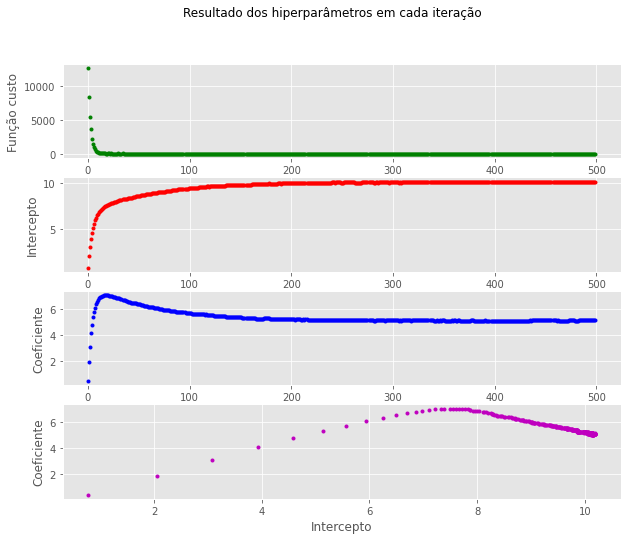

In [ ]:
fig, axs = plt.subplots(4,figsize=(10,8))
fig.suptitle('Resultado dos hiperparâmetros em cada iteração')
axs[0].set_ylabel('Função custo',rotation=90)
#axs[0].set_xlabel('Iterações')
axs[0].plot(range(n_iter),cost_history,'g.')
axs[1].set_ylabel('Intercepto',rotation=90)
#axs[1].set_xlabel('Iterações')
axs[1].plot(range(n_iter),theta_history0,'r.')
axs[2].set_ylabel('Coeficiente',rotation=90)
axs[2].set_xlabel('Iterações')
axs[2].plot(range(n_iter),theta_history1,'b.')
axs[3].set_ylabel('Coeficiente',rotation=90)
axs[3].set_xlabel('Intercepto')
axs[3].plot(theta_history0,theta_history1,'m.')

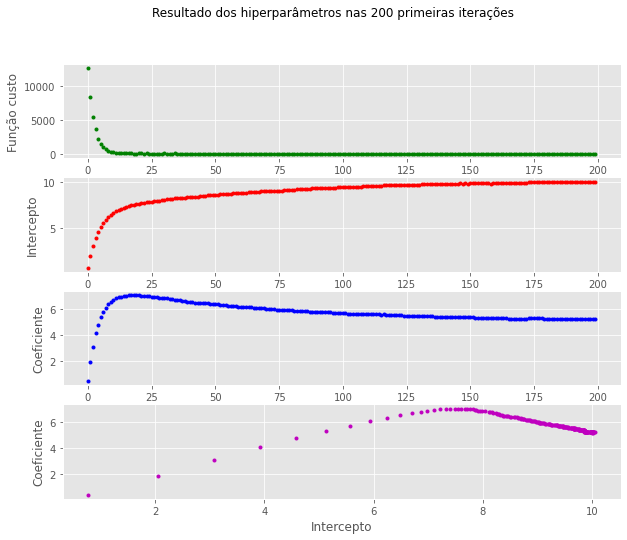

In [ ]:
fig, axs = plt.subplots(4,figsize=(10,8))
fig.suptitle('Resultado dos hiperparâmetros nas 200 primeiras iterações')
axs[0].set_ylabel('Função custo',rotation=90)
#axs[0].set_xlabel('Iterações')
axs[0].plot(range(200),cost_history[:200],'g.')
axs[1].set_ylabel('Intercepto',rotation=90)
#axs[1].set_xlabel('Iterações')
axs[1].plot(range(200),theta_history0[:200],'r.')
axs[2].set_ylabel('Coeficiente',rotation=90)
axs[2].set_xlabel('Iterações')
axs[2].plot(range(200),theta_history1[:200],'b.')
axs[3].set_ylabel('Coeficiente',rotation=90)
axs[3].set_xlabel('Intercepto')
axs[3].plot(theta_history0[:200],theta_history1[:200],'m.')

In [ ]:
sgd0 = theta_history0
sgd1 = theta_history1

# Mini Batch Gradient Descent

In [ ]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history0 = np.zeros(iterations)
    theta_history1 = np.zeros(iterations)

    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        theta_history0[it] = theta[0][0]
        theta_history1[it] = theta[1][0]
        
    return theta, cost_history,theta_history0,theta_history1

In [ ]:
lr =0.1
n_iter = 600

theta = np.random.randn(2,1)

comeco = time.clock()
theta,cost_history,theta_history0,theta_history1 = minibatch_gradient_descent(X,y,theta,lr,n_iter)
fim = time.clock()

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta_history0[np.where(cost_history==min(cost_history))[0][0]],
                                                                   theta_history1[np.where(cost_history==min(cost_history))[0][0]]))
print('Final cost/MSE:  {:0.3f}'.format(min(cost_history)))
print('Tempo de execucao:  {:0.3f}'.format((fim - comeco)))
print('Iteração com menor função custo:  {:0.0f}'.format(np.where(cost_history==min(cost_history))[0][0]))

Theta0:          10.145,
Theta1:          5.096
Final cost/MSE:  985.797
Tempo de execucao:  0.184
Iteração com menor função custo:  519


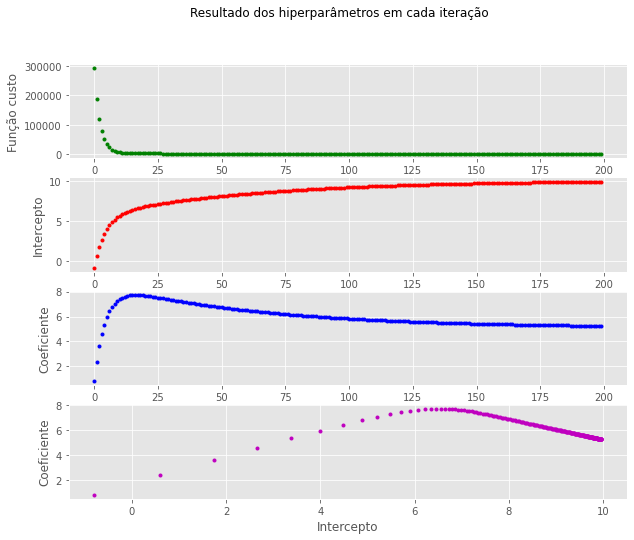

In [ ]:
fig, axs = plt.subplots(4,figsize=(10,8))
fig.suptitle('Resultado dos hiperparâmetros em cada iteração')
axs[0].set_ylabel('Função custo',rotation=90)
#axs[0].set_xlabel('Iterações')
axs[0].plot(range(n_iter),cost_history,'g.')
axs[1].set_ylabel('Intercepto',rotation=90)
#axs[1].set_xlabel('Iterações')
axs[1].plot(range(n_iter),theta_history0,'r.')
axs[2].set_ylabel('Coeficiente',rotation=90)
axs[2].set_xlabel('Iterações')
axs[2].plot(range(n_iter),theta_history1,'b.')
axs[3].set_ylabel('Coeficiente',rotation=90)
axs[3].set_xlabel('Intercepto')
axs[3].plot(theta_history0,theta_history1,'m.')

In [ ]:
mbgd0 = theta_history0
mbgd1 = theta_history1

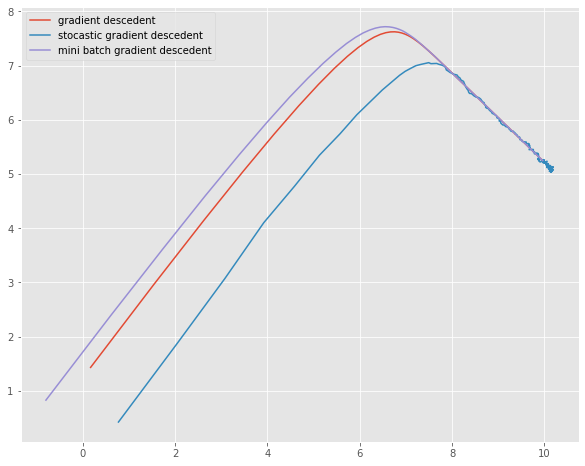

In [ ]:
fig, axs = plt.subplots(figsize=(10,8))
axs.plot(gd0, gd1)
axs.plot(sgd0,sgd1)
axs.plot(mbgd0,mbgd1)
axs.legend(['gradient descedent','stocastic gradient descedent','mini batch gradient descedent'], loc='upper left')

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# Fitting training data
reg = reg.fit(X, y)

In [ ]:
print('Intercepto scklearn:  {:0.3f}'.format(reg.intercept_[0]))
print('Coeficiente scklearn:  {:0.3f}'.format(reg.coef_[0][0]))

Intercepto scklearn:  10.148
Coeficiente scklearn:  5.097


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [61]:
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3,loss="squared_loss", penalty=None))

In [64]:
reg = SGDRegressor(loss="squared_loss", penalty=None)
reg.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [69]:
print('Intercepto scklearn:  {:0.3f}'.format(reg.intercept_[0]))
print('Coeficiente scklearn:  {:0.3f}'.format(reg.coef_[0]))

Intercepto scklearn:  9.710
Coeficiente scklearn:  5.456


In [70]:
reg.get_params

<bound method BaseEstimator.get_params of SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)>